### Overview

This notebook will be a quick introduction to python's pandas library for beginners to data science.
It will be typed out live before an audience as a code along introductory session.

<b>The learning objectives in 15 minutes:</b>
1. Learn two ways to load data into pandas
2. Exploratory data analysis
    - Ways to View Sample Data
    - Change Headers
    - Manipulate Columns and Rows
    - Find Data Using Statistics
    - Quick Plots with Pandas Plot Methods
3. Review learnings and possible next steps

### Imports and Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Method 1: Download csv from https://finance.yahoo.com/quote/AAPL/history?p=AAPL
aapl_sheet = pd.read_csv('./data/AAPL.csv').set_index('Date')

In [2]:
aapl_sheet.sample(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-04-13,0.124442,0.125000,0.124442,0.124442,0.098010,16060800.0
1986-02-03,0.103237,0.107143,0.102121,0.106585,0.083946,350022400.0
1981-06-05,0.141741,0.141741,0.141183,0.141183,0.111195,57680000.0


In [3]:
aapl_sheet.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101087,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095813,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088780,105728000.0


In [4]:
aapl_sheet.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800.0
2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800.0
2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111235300.0


In [5]:
aapl_sheet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10110 entries, 1980-12-12 to 2021-01-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10109 non-null  float64
 1   High       10109 non-null  float64
 2   Low        10109 non-null  float64
 3   Close      10109 non-null  float64
 4   Adj Close  10109 non-null  float64
 5   Volume     10109 non-null  float64
dtypes: float64(6)
memory usage: 552.9+ KB


In [6]:
aapl_sheet.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10109.000000,10109.000000,10109.000000,10109.000000,10109.000000,1.010900e+04
mean,10.047465,10.155937,9.937584,10.050526,9.499448,3.391036e+08
std,19.886890,20.119773,19.650572,19.893687,19.557589,3.418705e+08
min,0.049665,0.049665,0.049107,0.049107,0.038677,1.388800e+06
25%,0.272321,0.279018,0.265625,0.272321,0.230810,1.301968e+08
50%,0.443393,0.450714,0.434152,0.444196,0.371497,2.266600e+08
75%,11.607142,11.635715,11.482857,11.595715,10.003056,4.222512e+08
max,138.050003,138.789993,134.339996,136.690002,136.690002,7.421641e+09


In [7]:
# Method 2: Use pandas_datareader, pip3 install pandas-datareader from terminal
import pandas_datareader.data as web

In [8]:
aapl_web = web.DataReader('aapl'
                          , 'yahoo'
                          , start = '12/12/1980'
                         ).reset_index()

In [9]:
aapl_web.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101073
1,1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095800
2,1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088768


In [10]:
aapl_web.tail(3)

,Date,High,Low,Open,Close,Volume,Adj Close
10107,2021-01-14,131.000000,128.759995,130.800003,128.910004,90221800.0,128.910004
10108,2021-01-15,130.220001,127.000000,128.779999,127.139999,111235300.0,127.139999
10109,2021-01-19,128.710007,126.938004,127.779999,127.607803,52745810.0,127.607803


In [11]:
aapl_web.sample(3)

,Date,High,Low,Open,Close,Volume,Adj Close
937,1984-08-28,0.126116,0.123326,0.124442,0.126116,59158400.0,0.099315
2874,1992-04-28,0.497768,0.473214,0.493304,0.484375,174126400.0,0.399698
8535,2014-10-16,24.430000,23.852501,23.887501,24.065001,288618000.0,21.827372


In [12]:
aapl_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10110 entries, 0 to 10109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10110 non-null  datetime64[ns]
 1   High       10110 non-null  float64       
 2   Low        10110 non-null  float64       
 3   Open       10110 non-null  float64       
 4   Close      10110 non-null  float64       
 5   Volume     10110 non-null  float64       
 6   Adj Close  10110 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 553.0 KB


In [13]:
aapl_web.describe()

,High,Low,Open,Close,Volume,Adj Close
count,10110.000000,10110.000000,10110.000000,10110.000000,1.011000e+04,10110.000000
mean,10.167663,9.949157,10.059110,10.062154,3.393203e+08,9.511124
std,20.153298,19.684024,19.920348,19.927031,3.416925e+08,19.591869
min,0.049665,0.049107,0.049665,0.049107,1.388800e+06,0.038671
25%,0.279018,0.265625,0.272321,0.272321,1.305678e+08,0.230833
50%,0.450714,0.434152,0.443482,0.444196,2.267048e+08,0.371517
75%,11.653125,11.497054,11.611428,11.608571,4.222372e+08,10.014141
max,138.789993,134.339996,138.050003,136.690002,7.421641e+09,136.690002


In [14]:
# Get Column Headers
aapl_web.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [15]:
# Change Headers Method 1: df.rename()
aapl_web.rename(columns = {'Adj Close': 'Adjusted Close'
                           , 'Volume': 'Daily Trade Volume'
                          }, inplace = True)
aapl_web.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Daily Trade Volume',
       'Adjusted Close'],
      dtype='object')

In [16]:
# Change Headers Method 2: df.columns = [arr]
aapl_web.columns = ['Date'
                    , 'Daily High'
                    , 'Daily Low'
                    , 'Daily Open'
                    , 'Daily Close'
                    , 'Daily Volume'
                    , 'Adj Close'
                   ]
aapl_web.head(3)

,Date,Daily High,Daily Low,Daily Open,Daily Close,Daily Volume,Adj Close
0,1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101073
1,1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095800
2,1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088768


### Manipulating DataFrame Columns and Rows

In [17]:
# Additional columns
aapl_web['Daily OC % Change'] = (aapl_web['Daily Close'] - aapl_web['Daily Open']) / aapl_web['Daily Open'] * 100
aapl_web['Daily HL % Change'] = (aapl_web['Daily High'] - aapl_web['Daily Low']) / aapl_web['Daily Low'] * 100
aapl_web['Interday % Change'] = aapl_web['Adj Close'].pct_change()
aapl_web['5 Day Avg Adj Close'] = aapl_web['Adj Close'].rolling(5).mean()
aapl_web['5 Day Avg Std Adj Close'] = aapl_web['Adj Close'].rolling(5).std()
aapl_web.head(10)

,Date,Daily High,Daily Low,Daily Open,Daily Close,Daily Volume,Adj Close,Daily OC % Change,Daily HL % Change,Interday % Change,5 Day Avg Adj Close,5 Day Avg Std Adj Close
0,1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101073,0.000000,0.434758,NaN,NaN,NaN
1,1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095800,-0.456594,0.458689,-0.052171,NaN,NaN
2,1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088768,-0.492577,0.495016,-0.073397,NaN,NaN
3,1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090965,0.000000,0.483066,0.024751,NaN,NaN
4,1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093603,0.000000,0.469449,0.028992,0.094042,0.004743
5,1980-12-19,0.126674,0.126116,0.126116,0.126116,48630400.0,0.099315,0.000000,0.442453,0.061029,0.093690,0.004115
6,1980-12-22,0.132813,0.132254,0.132254,0.132254,37363200.0,0.104149,0.000000,0.422673,0.048670,0.095360,0.006300
7,1980-12-23,0.138393,0.137835,0.137835,0.137835,46950400.0,0.108544,0.000000,0.404835,0.042199,0.099315,0.007261
8,1980-12-24,0.145647,0.145089,0.145089,0.145089,48003200.0,0.114256,0.000000,0.384594,0.052628,0.103973,0.007999
9,1980-12-26,0.159040,0.158482,0.158482,0.158482,55574400.0,0.124803,0.000000,0.352093,0.092309,0.110213,0.009843


In [18]:
aapl_web.dropna(axis=0, inplace=True)
aapl_web.head(10)

,Date,Daily High,Daily Low,Daily Open,Daily Close,Daily Volume,Adj Close,Daily OC % Change,Daily HL % Change,Interday % Change,5 Day Avg Adj Close,5 Day Avg Std Adj Close
4,1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093603,0.000000,0.469449,0.028992,0.094042,0.004743
5,1980-12-19,0.126674,0.126116,0.126116,0.126116,48630400.0,0.099315,0.000000,0.442453,0.061029,0.093690,0.004115
6,1980-12-22,0.132813,0.132254,0.132254,0.132254,37363200.0,0.104149,0.000000,0.422673,0.048670,0.095360,0.006300
7,1980-12-23,0.138393,0.137835,0.137835,0.137835,46950400.0,0.108544,0.000000,0.404835,0.042199,0.099315,0.007261
8,1980-12-24,0.145647,0.145089,0.145089,0.145089,48003200.0,0.114256,0.000000,0.384594,0.052628,0.103973,0.007999
9,1980-12-26,0.159040,0.158482,0.158482,0.158482,55574400.0,0.124803,0.000000,0.352093,0.092309,0.110213,0.009843
10,1980-12-29,0.161272,0.160714,0.160714,0.160714,93161600.0,0.126561,0.000000,0.347203,0.014084,0.115662,0.009843
11,1980-12-30,0.157366,0.156808,0.157366,0.156808,68880000.0,0.123485,-0.354580,0.355842,-0.024304,0.119530,0.007768
12,1980-12-31,0.152902,0.152344,0.152902,0.152344,35750400.0,0.119969,-0.364942,0.366279,-0.028467,0.121815,0.004868
13,1981-01-02,0.155134,0.154018,0.154018,0.154018,21660800.0,0.121288,0.000000,0.724596,0.010988,0.123221,0.002647


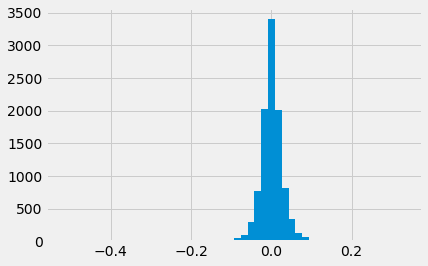

In [19]:
aapl_web['Interday % Change'].hist(bins=50);

In [20]:
# Use specific columns
aapl_use = aapl_web[['Date', 'Adj Close']].copy()
aapl_use.head(3)

,Date,Adj Close
4,1980-12-18,0.093603
5,1980-12-19,0.099315
6,1980-12-22,0.104149


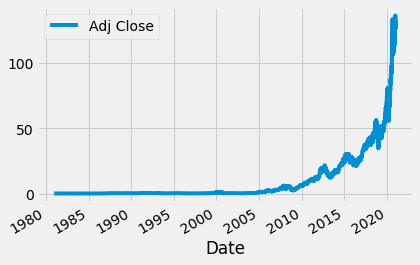

In [21]:
aapl_use.plot(x='Date'
              , y='Adj Close'
             );

In [22]:
# iloc like (x, y) or (row, column)
aapl_use.iloc[0, 1] 

0.09360260516405106

In [23]:
# .loc uses logic
aapl_use.loc[(aapl_use.Date > '2021-01-01') & (aapl_use['Adj Close'] >= 130)]

,Date,Adj Close
10100,2021-01-05,131.009995
10102,2021-01-07,130.919998
10103,2021-01-08,132.050003
10106,2021-01-13,130.889999


In [24]:
aapl_use.loc[(aapl_use.Date >= '2020-01-19') & (aapl_use['Adj Close'] > 80)]

,Date,Adj Close
9864,2020-01-29,80.390747
9865,2020-01-30,80.274246
9870,2020-02-06,80.606384
9874,2020-02-12,81.292099
9875,2020-02-13,80.713219
...,...,...
10105,2021-01-12,128.800003
10106,2021-01-13,130.889999
10107,2021-01-14,128.910004
10108,2021-01-15,127.139999


In [25]:
aapl_use['Date'] = pd.to_datetime(aapl_use['Date'])
aapl_use.set_index('Date', drop=True, inplace=True)

In [26]:
aapl_use.resample('M').agg(np.mean)[-12:]

,Adj Close
Date,
2020-02-29,77.295005
2020-03-31,65.203637
2020-04-30,67.673726
2020-05-31,77.173761
2020-06-30,86.147373
2020-07-31,95.229960
2020-08-31,117.059875
2020-09-30,114.926960
2020-10-31,116.212687


In [27]:
# Find corrleations between columns
aapl_corr = aapl_web.corr()
aapl_corr

,Daily High,Daily Low,Daily Open,Daily Close,Daily Volume,Adj Close,Daily OC % Change,Daily HL % Change,Interday % Change,5 Day Avg Adj Close,5 Day Avg Std Adj Close
Daily High,1.000000,0.999870,0.999930,0.999912,-0.151123,0.999303,0.011242,-0.228075,0.007729,0.999215,0.800918
Daily Low,0.999870,1.000000,0.999899,0.999918,-0.153443,0.999188,0.011610,-0.233126,0.008228,0.999003,0.795210
Daily Open,0.999930,0.999899,1.000000,0.999838,-0.151984,0.999164,0.008866,-0.230176,0.006177,0.999112,0.798192
Daily Close,0.999912,0.999918,0.999838,1.000000,-0.152310,0.999335,0.013955,-0.230600,0.010333,0.999075,0.797990
Daily Volume,-0.151123,-0.153443,-0.151984,-0.152310,1.000000,-0.157950,0.008440,0.379521,-0.000258,-0.157493,-0.060603
Adj Close,0.999303,0.999188,0.999164,0.999335,-0.157950,1.000000,0.014027,-0.221496,0.010369,0.999701,0.802223
Daily OC % Change,0.011242,0.011610,0.008866,0.013955,0.008440,0.014027,1.000000,0.009870,0.812765,0.010678,0.006841
Daily HL % Change,-0.228075,-0.233126,-0.230176,-0.230600,0.379521,-0.221496,0.009870,1.000000,-0.024575,-0.220120,-0.065846
Interday % Change,0.007729,0.008228,0.006177,0.010333,-0.000258,0.010369,0.812765,-0.024575,1.000000,0.005106,0.002291
5 Day Avg Adj Close,0.999215,0.999003,0.999112,0.999075,-0.157493,0.999701,0.010678,-0.220120,0.005106,1.000000,0.802352


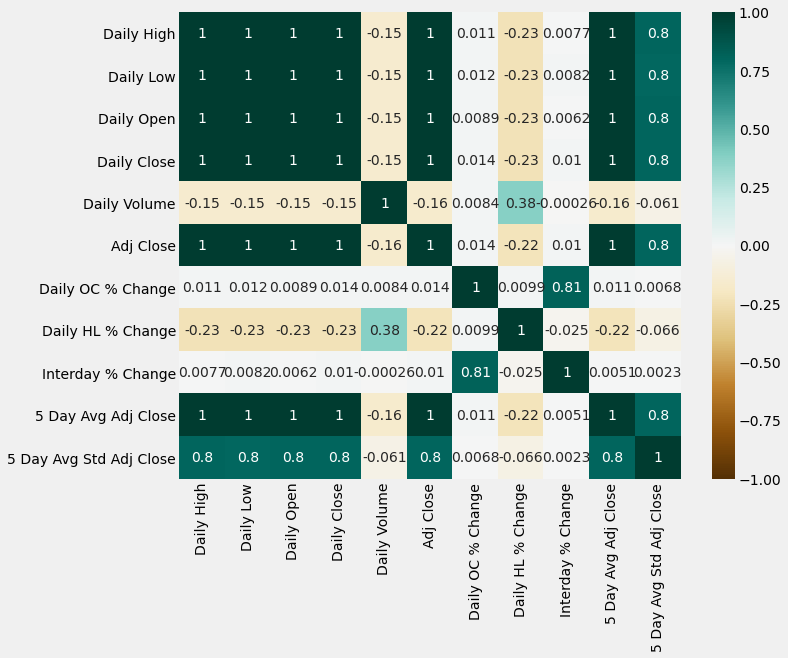

In [28]:
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(aapl_corr, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG');

### What did we learn?

<b>Data Import</b>
1. Learned how to import through file downloads
2. Learned how to import through pandas_datareader.data

<b>Data manipulation</b>
1. Find features of the dataframe
2. Locate data on the dataframe using .loc and .iloc
3. Find summary statistics
4. Quick plots using .hist() and .plot
5. Find correlations between features (columns)

<b>Next Steps</b>
1. Download more data of other securities
2. Merge tables
3. Find correlations between stocks from different industries 

In [ ]:
tsla = web.DataReader